In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../1.1_Data/laptop_Training.csv')

In [3]:
dataset.head()

,marka,Isletim_Sistemi,Islemci_Tipi,Islemci_Nesli,SSD_Kapasitesi,Ram,Hard_Disk_Kapasitesi,Ekran_Yenileme_Hizi,Ekran_Karti,Ekran_Boyutu,Fiyat
0,16,1,17,4.0,0.0,4.0,0.0,60.0,14,15.6,6.7990
1,18,3,10,13.0,256.0,16.0,256.0,60.0,28,13.0,22.9733
2,16,1,8,5.0,512.0,16.0,0.0,60.0,3,15.6,13.0990
3,2,1,20,11.0,512.0,8.0,0.0,144.0,44,15.6,24.7500
4,0,2,17,2.0,128.0,4.0,0.0,60.0,24,15.6,6.2900


In [4]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values
y = y.reshape(-1, 1) 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1420, 10)
X_test:  (356, 10)
y_train:  (1420, 1)
y_test:  (356, 1)


In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 0.4295901649488548 


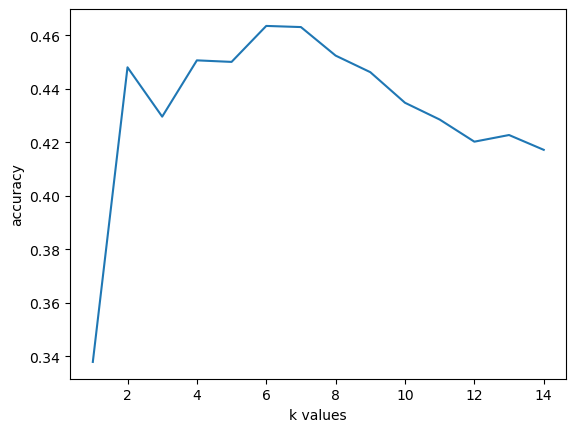

In [18]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsRegressor(n_neighbors=each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [22]:
# en iyi sonucu 6 da aldık 
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(6,knn.score(X_test,y_test)))

 6 nn score: 0.463523795512783 


In [23]:
import joblib
joblib.dump(knn, "../4.1_Models/KNN_model.pkl")

['../4.1_Models/KNN_model.pkl']